In [1]:
import pandas as pd
df = pd.read_csv('../assets/data/engineered.txt')
print(df.shape)
df.head()

(3729, 20)


,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,cmp%,ny/a,ypc,rush-split,td:touch,to:touch
0,Eli Manning,2013,23,42,256,1,1,2.0,18.0,2,-2,0,1,46.0,0.547619,5.409091,-1.00,-0.008475,0.021739,0.043478
1,Peyton Manning,2013,32,51,400,4,0,1.0,3.0,0,0,0,0,52.0,0.627451,7.634615,0.00,0.000000,0.076923,0.000000
2,Cam Newton,2013,13,22,181,1,1,4.0,40.0,4,6,0,0,30.0,0.590909,5.423077,1.50,0.040816,0.033333,0.033333
3,Carson Palmer,2013,13,25,178,1,4,2.0,10.0,5,-3,0,0,32.0,0.520000,6.222222,-0.60,-0.018182,0.031250,0.125000
4,Philip Rivers,2013,19,29,201,1,1,1.0,5.0,4,-3,0,1,34.0,0.655172,6.533333,-0.75,-0.015544,0.029412,0.058824


In [2]:
# split into train/test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     stratify=df['player'],
                                     random_state=143)

labels = df['player'].unique()
y_col = 'player'
X_cols = ['touches', 'cmp%', 'ny/a', 'ypc', 'rush-split', 'td:touch', 'to:touch']

X_train = df_train[X_cols]
X_test = df_test[X_cols]
y_train = df_train[y_col]
y_test = df_test[y_col]

labels

array(['Eli Manning', 'Peyton Manning', 'Cam Newton', 'Carson Palmer',
       'Philip Rivers', 'Ben Roethlisberger', 'Tony Romo', 'Matt Schaub',
       'Alex Smith', 'Matthew Stafford', 'Michael Vick', 'Russell Wilson',
       'Joe Flacco', 'Tom Brady', 'Drew Brees', 'Matt Cassel',
       'Jay Cutler', 'Andy Dalton', 'Ryan Fitzpatrick', 'Matt Ryan',
       'Matt Hasselbeck', 'Aaron Rodgers', 'Brett Favre'], dtype=object)

In [3]:
# majority baseline
from sklearn.dummy import DummyClassifier
model_maj = DummyClassifier(strategy='most_frequent')
model_maj.fit(X_train, y_train)

# the default "subset accuracy" is pretty bad
model_maj.score(X_test, y_test)

0.064343163538874

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# but the roc-auc score is even worse (as expected);
# absolutely no ability to distinguish classes--
# because it only ever predicts one
roc_auc_score(label_binarize(y_test, classes=labels), model_maj.predict_proba(X_test))

0.5

In [5]:
# save this highly important contribution to machine learning
import pickle
pickle.dump(model_maj, open('../assets/models/majority.pkl', 'wb'))

In [6]:
# we want the "majority baseline" to
# apply when there are a limited number
# of options; ie, of any *subset* of
# our labels, pick out the most frequent
byfreq = list(df[y_col].value_counts(normalize=True).to_dict().keys())
byfreq = '\n'.join(byfreq)
fo = open('../assets/data/byfreq.txt', 'w')
fo.write(byfreq)
fo.close()

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


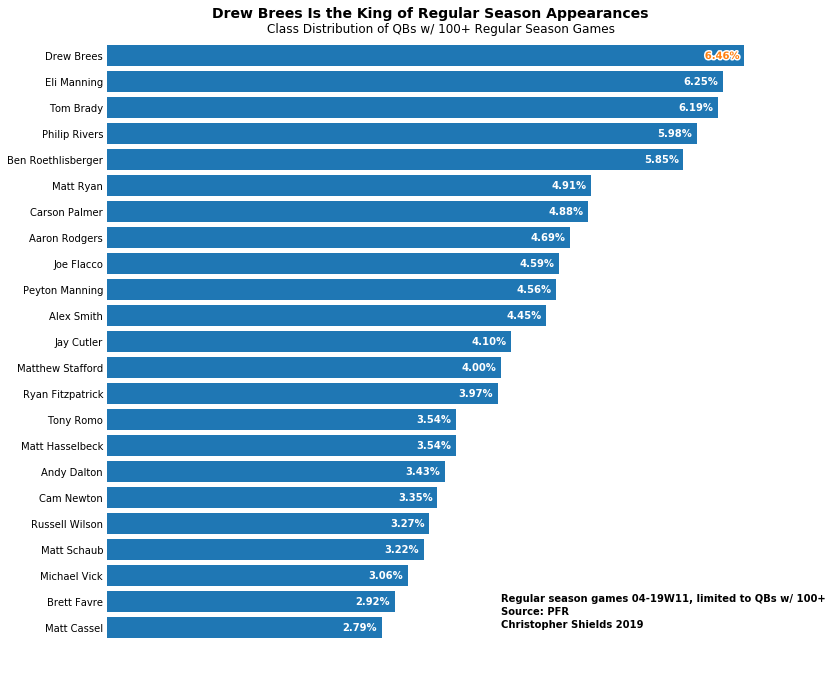

In [59]:
# "diagram" to help people understand the model
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

vc = df['player'].value_counts(normalize=True).to_dict()
x = [_ for _ in vc]
y = [vc[_] for _ in vc]
plt.figure(figsize=(12,12))
plt.suptitle('Drew Brees Is the King of Regular Season Appearances',
             fontsize=14,
             fontweight='bold',
             y=0.89)
plt.title('Class Distribution of QBs w/ 100+ Regular Season Games',
          y=0.965)

for i in range(len(y)):
    xx = y[i] - 0.004
    yy = i + 0.13
    lbl = f'{y[i]*100:.2f}%'
    if i == 0:
        txt = plt.text(xx, yy, lbl, fontweight='bold', color='C1')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=3, foreground='white')
        ])
    else:
        plt.text(xx, yy, lbl, fontweight='bold', color='white')
    
ax = plt.axes()
ax.tick_params(axis='both', length=0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.barh(x, y)
plt.xticks([])
plt.gca().invert_yaxis()
plt.text(0.04, 21, 'Regular season games 04-19W11, limited to QBs w/ 100+', fontweight='bold')
plt.text(0.04, 21.5, 'Source: PFR', fontweight='bold')
plt.text(0.04, 22, 'Christopher Shields 2019', fontweight='bold')
plt.savefig('../assets/class-dist.png')
plt.show()